| **Inicio** | **atrás 17** | **Siguiente 19** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./17_K-Vecinos_Mas_Cercanos.ipynb)| [⏩](./19_Precision_Accuracy_Recall_F1.ipynb)|

# **18. Detecta Clusters con Propagación de Afinidad (Affinity Propagation): Algoritmo paso a paso en Python**

## **Introducción**

La propagación de afinidad (Affinity Propagation) es un algoritmo de agrupación que busca automáticamente el número de clústeres en un conjunto de datos y asigna cada punto a un clúster. A diferencia de otros algoritmos de agrupación que requieren especificar el número de clústeres de antemano, Affinity Propagation determina tanto los ejemplos representativos (llamados "exemplares") como los clústeres. Aquí tienes una explicación paso a paso con un ejemplo y su respectiva gráfica en código Python:

1. **Selección de Ejemplares Iniciales**: Affinity Propagation comienza seleccionando los ejemplares iniciales. Estos son puntos del conjunto de datos que actúan como representantes iniciales para los clústeres.

2. **Calculo de las Similitudes**: Se calcula una matriz de similitud entre todos los puntos del conjunto de datos. La similitud puede medirse utilizando métricas como la distancia euclidiana o la similitud coseno.

3. **Actualización de las Responsabilidades y Disponibilidades**: Affinity Propagation actualiza dos matrices, llamadas "responsabilidades" y "disponibilidades", que representan la idoneidad de cada punto para ser el ejemplar de otro punto y la cantidad de evidencia disponible para el punto para ser el ejemplar de otro, respectivamente.

4. **Actualización de los Ejemplares**: Los ejemplares se actualizan en función de las responsabilidades y disponibilidades. Los puntos con altas responsabilidades tienden a convertirse en ejemplares, y los puntos con disponibilidades bajas tienden a dejar de ser ejemplares.

5. **Asignación de Puntos a Clústeres**: Los puntos se asignan a clústeres basados en las responsabilidades y los ejemplares. Cada punto es asignado al ejemplar con el que tiene la mayor responsabilidad.

6. **Iteración**: Los pasos 3 a 5 se repiten hasta que el algoritmo converja. La convergencia ocurre cuando los ejemplares y las asignaciones de puntos ya no cambian significativamente.

Aquí tienes un ejemplo de cómo implementar Affinity Propagation utilizando Python y cómo visualizar los resultados:

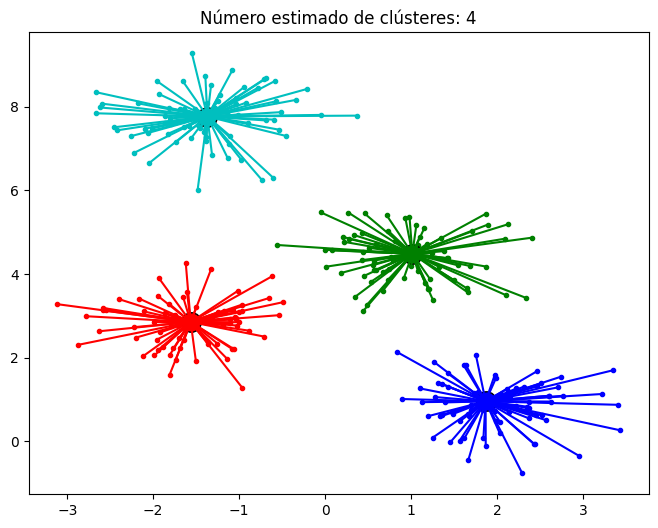

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from itertools import cycle

# Crear datos ficticios con 4 clústeres
X, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Crear un modelo de Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)

# Obtener los ejemplares y etiquetas de clúster
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# Mostrar los resultados
plt.figure(figsize=(8, 6))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Número estimado de clústeres: %d' % n_clusters_)
plt.show()

En este ejemplo, hemos utilizado la función `make_blobs` para generar datos ficticios con 4 clústeres. Luego, aplicamos Affinity Propagation para detectar automáticamente los clústeres. Finalmente, visualizamos los resultados mostrando los ejemplares y las asignaciones de puntos a los clústeres. Cada color en el gráfico representa un clúster diferente.

## **Conceptos de Propagación de Afinidad**

La Propagación de Afinidad (Affinity Propagation) es un algoritmo de agrupación que se basa en el concepto de "afinidad" entre los puntos de datos. A diferencia de otros algoritmos de agrupación que requieren definir previamente el número de clústeres, la Propagación de Afinidad determina automáticamente tanto los ejemplares (representantes) como los clústeres. Aquí están los conceptos clave detrás de la Propagación de Afinidad:

1. **Responsabilidad (Responsibility)**: Para cada par de puntos, la responsabilidad mide cuánto se espera que un punto elija otro punto como su ejemplar. Se calcula mediante la diferencia entre la similitud del punto actual con otro punto y la máxima similitud entre el punto actual y cualquier otro punto. Una alta responsabilidad significa que el punto actual es probable que elija el otro punto como su ejemplar.

2. **Disponibilidad (Availability)**: La disponibilidad mide cuánta evidencia hay de que un punto elija otro punto como su ejemplar. Se calcula utilizando la responsabilidad recibida de otros puntos y se ajusta por la "auto-disponibilidad", que es la cantidad de evidencia que el punto tiene para ser su propio ejemplar. Una alta disponibilidad significa que el punto tiene mucha evidencia para ser el ejemplar de otro punto.

3. **Ejemplares (Exemplars)**: Los ejemplares son los puntos que actúan como representantes de cada clúster. Estos son puntos que tienen alta disponibilidad y alta responsabilidad, lo que significa que son buenos ejemplares y atraen a otros puntos a su clúster.

4. **Paso de Mensajes**: El algoritmo de Propagación de Afinidad se basa en un proceso iterativo en el que se actualizan las responsabilidades y las disponibilidades en cada iteración. Los puntos envían mensajes entre sí para ajustar sus responsabilidades y disponibilidades en función de la afinidad con otros puntos.

5. **Convergencia**: El algoritmo converge cuando las responsabilidades y las disponibilidades dejan de cambiar significativamente entre iteraciones. En este punto, los ejemplares y los clústeres están estabilizados.

La Propagación de Afinidad es especialmente útil cuando no se conoce el número de clústeres por adelantado y cuando los clústeres pueden tener formas y tamaños irregulares. Sin embargo, también puede ser computacionalmente costosa, ya que involucra calcular y actualizar la afinidad entre todos los pares de puntos en cada iteración.

El objetivo final de la Propagación de Afinidad es asignar cada punto a un clúster y determinar qué puntos son los ejemplares representativos de cada clúster. Esto se logra iterando el proceso de actualización de responsabilidades y disponibilidades hasta que el algoritmo converja y las asignaciones sean estables.

## **Matrices para Propagación de Afinidad**

Las matrices utilizadas en el algoritmo de Propagación de Afinidad son la matriz de similitud y las matrices de responsabilidad y disponibilidad. Estas matrices son esenciales para calcular cómo los datos se propagan en el proceso iterativo del algoritmo. Aquí te proporcionaré una explicación detallada de cada una, junto con ejemplos y gráficas.

1. **Matriz de Similitud**:

La matriz de similitud captura la similitud entre cada par de puntos de datos en tu conjunto de datos. Puede ser una matriz cuadrada donde cada elemento (i, j) representa qué tan similares son los puntos de datos i y j. Las similitudes pueden ser calculadas utilizando diversas métricas, como la distancia euclidiana, la similitud del coseno, entre otras.

Ejemplo:

Supongamos que tenemos un conjunto de datos de tres puntos en 2D: A(1, 2), B(3, 4) y C(5, 6). Usaremos la distancia euclidiana como métrica de similitud.

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

data = np.array([[1, 2], [3, 4], [5, 6]])
similarity_matrix = euclidean_distances(data)
print(similarity_matrix)

[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]


2. **Matriz de Responsabilidad**:

La matriz de responsabilidad (R) mide la responsabilidad que un punto tiene para ser un ejemplar de otro punto. Cuanto más grande es el valor en R(i, j), más probable es que el punto j sea elegido como el ejemplar del punto i. Se actualiza iterativamente para reflejar la influencia de otros puntos en la elección del ejemplar.

3. **Matriz de Disponibilidad**:

La matriz de disponibilidad (A) mide la disponibilidad que tiene un punto para elegir otro punto como su ejemplar. Cuanto más grande es el valor en A(i, j), más probable es que el punto i elija el punto j como su ejemplar. Al igual que la matriz de responsabilidad, la matriz de disponibilidad también se actualiza en cada iteración.

En conjunto, estas matrices permiten que los puntos de datos influyan entre sí para determinar sus roles como ejemplares y la asignación final a clusters. El algoritmo de Propagación de Afinidad itera sobre las matrices de responsabilidad y disponibilidad hasta que converjan a un estado estable.

Es importante destacar que el algoritmo de Propagación de Afinidad es complejo y puede ser computacionalmente intensivo. En muchos casos, es más conveniente utilizar implementaciones de bibliotecas como Scikit-Learn para llevar a cabo este algoritmo.

Recuerda que debido a la complejidad del algoritmo y las matrices involucradas, no es necesario manipular manualmente estas matrices en la mayoría de los casos. Las bibliotecas como Scikit-Learn se encargan de eso internamente.

## **Matriz de Similitud**

La matriz de similitud es una herramienta esencial en el análisis de datos y el aprendizaje automático. Representa cómo se parecen los objetos o puntos de datos entre sí en función de alguna métrica de similitud. Esta matriz juega un papel crucial en varios algoritmos, como el clustering, la clasificación y la recomendación.

**Explicación detallada con ejemplos y gráficas**:

Supongamos que tenemos un conjunto de datos con puntos en un espacio bidimensional y queremos calcular la matriz de similitud utilizando la distancia euclidiana como métrica de similitud. Aquí hay un ejemplo de cómo calcularíamos la matriz de similitud para tres puntos: A(1, 2), B(3, 4) y C(5, 6).

1. **Cálculo de Distancias**:

Primero, calculamos las distancias euclidianas entre todos los pares de puntos. La distancia euclidiana entre dos puntos (x1, y1) y (x2, y2) en un espacio bidimensional se calcula como:

$\text{distancia} = \sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

Para el ejemplo, las distancias serían:

- Distancia entre A y B: ($\sqrt{(3 - 1)^2 + (4 - 2)^2} = \sqrt{8}$)

- Distancia entre A y C: ($\sqrt{(5 - 1)^2 + (6 - 2)^2} = \sqrt{32}$)

- Distancia entre B y C: ($\sqrt{(5 - 3)^2 + (6 - 4)^2} = \sqrt{8}$)

2. **Construcción de la Matriz de Similitud**:

Una vez que tenemos las distancias, podemos construir la matriz de similitud. En este caso, utilizamos la fórmula inversa de la distancia para calcular la similitud, donde valores más pequeños indican mayor similitud.

$\text{similitud} = \frac{1}{\text{distancia} + \epsilon}$

Aquí, ($\epsilon$) es una constante pequeña para evitar divisiones por cero.

Para el ejemplo, la matriz de similitud sería:

$
\begin{bmatrix}
1 & \frac{1}{\sqrt{8}+\epsilon} & \frac{1}{\sqrt{32}+\epsilon} \\
\frac{1}{\sqrt{8}+\epsilon} & 1 & \frac{1}{\sqrt{8}+\epsilon} \\
\frac{1}{\sqrt{32}+\epsilon} & \frac{1}{\sqrt{8}+\epsilon} & 1 \\
\end{bmatrix}
$

3. **Gráfica de la Matriz de Similitud**:

Aunque no es posible representar directamente una matriz de similitud en una gráfica, podemos visualizarla mediante una matriz de calor (heatmap) que resalte los valores de similitud.



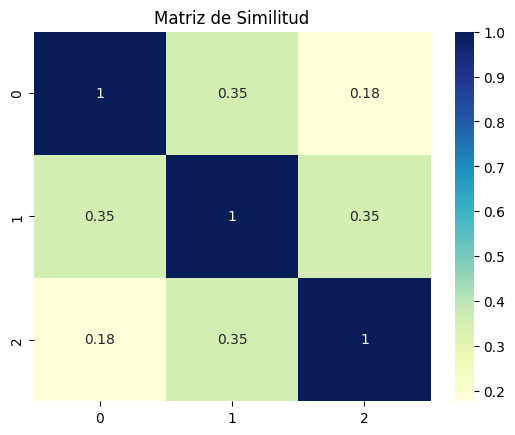

In [10]:
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los puntos y sus coordenadas
A = np.array([1, 2])
B = np.array([3, 4])
C = np.array([5, 6])

# Calcular las distancias
distance_AB = np.linalg.norm(A - B)
distance_AC = np.linalg.norm(A - C)
distance_BC = np.linalg.norm(B - C)

# Definir la matriz de similitud
similarity_matrix = np.array([[1, 1/(distance_AB + 1e-6), 1/(distance_AC + 1e-6)],
                              [1/(distance_AB + 1e-6), 1, 1/(distance_BC + 1e-6)],
                              [1/(distance_AC + 1e-6), 1/(distance_BC + 1e-6), 1]])

# Crear una gráfica de calor para la matriz de similitud
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu")
plt.title("Matriz de Similitud")
plt.show()

En esta gráfica de calor, los valores más claros indican mayor similitud, y los valores más oscuros indican menor similitud.

La matriz de similitud es una herramienta fundamental para medir cómo se parecen los objetos entre sí y se utiliza ampliamente en diversos algoritmos de aprendizaje automático y análisis de datos.

## **Matriz de Disponibilidad**

La matriz de disponibilidad es un concepto utilizado en el algoritmo de propagación de afinidad para medir cuánto una instancia considera otras instancias como "excepcionales". Esta matriz se calcula utilizando la información sobre la similitud entre las instancias y la matriz de responsabilidad. La disponibilidad refleja qué tan adecuadamente otras instancias pueden servir como prototipos para una instancia dada.

La matriz de disponibilidad se calcula mediante la fórmula:


$R(i, k) = \min(0, r(k, k) + \sum_{j \neq i, j \neq k} \max(0, r(j, k)))$

donde  $R(i, k)$ es la disponibilidad de la instancia ( $i$ ) respecto a la instancia ( $k$ ), y ( $r(j, k)$ ) es el valor en la matriz de responsabilidad correspondiente.

Vamos a ilustrar el concepto de matriz de disponibilidad con un ejemplo y código en Python:

In [11]:
import numpy as np

# Matriz de responsabilidad (ejemplo)
responsibility_matrix = np.array([[0.2, 0.5, 0.3],
                                  [0.6, 0.1, 0.3],
                                  [0.4, 0.2, 0.4]])

# Calcular la matriz de disponibilidad
availability_matrix = np.zeros_like(responsibility_matrix)
num_instances = responsibility_matrix.shape[0]

for i in range(num_instances):
    for k in range(num_instances):
        if i != k:
            availability_matrix[i, k] = min(0, responsibility_matrix[k, k] + np.sum(np.maximum(0, responsibility_matrix[:, k])) - responsibility_matrix[i, k])

print("Matriz de Disponibilidad:")
print(availability_matrix)

Matriz de Disponibilidad:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


En este ejemplo, primero definimos una matriz de responsabilidad ficticia. Luego, calculamos la matriz de disponibilidad utilizando la fórmula mencionada anteriormente. La matriz de disponibilidad nos muestra cómo cada instancia percibe las otras instancias como prototipos, y los valores más altos indican una mayor disponibilidad.

Esta matriz de disponibilidad se utiliza junto con la matriz de responsabilidad para actualizar la matriz de responsabilidad en cada iteración del algoritmo de propagación de afinidad. El proceso de iteración de actualización de ambas matrices continúa hasta que convergen a una solución final.

## **Matriz de Responsabilidad**

La matriz de responsabilidad es un componente fundamental en el algoritmo de propagación de afinidad. Esta matriz se utiliza para medir cuánto una instancia considera otras instancias como "prototipos" adecuados para representar su clase o grupo. La matriz de responsabilidad refleja la "responsabilidad" que una instancia tiene hacia otras instancias para ser el prototipo de su grupo.

La matriz de responsabilidad se calcula mediante la fórmula:


$R(i, k) = s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k')$

donde $R(i, k)$ es la responsabilidad de la instancia ( $i$ ) respecto a la instancia ( $k$ ), ( $s(i, k)$ ) es la similitud entre las instancias ( $i$ ) y ( $k$ ), y  $a(i, k')$  es el valor en la matriz de disponibilidad correspondiente.

Vamos a ilustrar el concepto de matriz de responsabilidad con un ejemplo y código en Python:

In [12]:
import numpy as np

# Matriz de similitud (ejemplo)
similarity_matrix = np.array([[1, 0.2, 0.5],
                              [0.2, 1, 0.8],
                              [0.5, 0.8, 1]])

# Matriz de disponibilidad (ejemplo)
availability_matrix = np.array([[0.1, 0.5, 0.2],
                                [0.3, 0.2, 0.4],
                                [0.2, 0.4, 0.1]])

# Calcular la matriz de responsabilidad
responsibility_matrix = np.zeros_like(similarity_matrix)
num_instances = similarity_matrix.shape[0]

for i in range(num_instances):
    for k in range(num_instances):
        if i != k:
            responsibility_matrix[i, k] = similarity_matrix[i, k] - np.max(availability_matrix[i, :] + similarity_matrix[i, :] - availability_matrix[k, k])

print("Matriz de Responsabilidad:")
print(responsibility_matrix)

Matriz de Responsabilidad:
[[ 0.  -0.7 -0.5]
 [-0.9  0.  -0.3]
 [-0.6 -0.2  0. ]]


En este ejemplo, primero definimos una matriz de similitud y una matriz de disponibilidad ficticias. Luego, calculamos la matriz de responsabilidad utilizando la fórmula mencionada anteriormente. La matriz de responsabilidad nos muestra cómo cada instancia considera otras instancias como prototipos, y los valores más altos indican una mayor responsabilidad.

Esta matriz de responsabilidad se utiliza junto con la matriz de disponibilidad para actualizar la matriz de disponibilidad en cada iteración del algoritmo de propagación de afinidad. El proceso de iteración de actualización de ambas matrices continúa hasta que convergen a una solución final.

## **Matriz de Asignaciones**

La matriz de asignaciones es otro componente clave en el algoritmo de propagación de afinidad. Esta matriz se utiliza para representar las conexiones entre las instancias y los "exemplares" o prototipos que se han identificado en el proceso de clustering. Cada fila de la matriz de asignaciones corresponde a una instancia, y la columna con el valor más alto en cada fila indica a qué exemplar se ha asignado esa instancia.

La matriz de asignaciones se actualiza en cada iteración del algoritmo de propagación de afinidad a medida que las instancias se asignan a exemplares. La asignación se realiza en función de los valores en la matriz de responsabilidad y la matriz de disponibilidad.

Vamos a explicar este concepto con un ejemplo y proporcionar código en Python para ilustrarlo:

Supongamos que hemos obtenido la matriz de responsabilidad y la matriz de disponibilidad en iteraciones anteriores del algoritmo de propagación de afinidad. Ahora, queremos calcular la matriz de asignaciones basada en estas matrices. Aquí hay un ejemplo de cómo hacerlo:

In [13]:
import numpy as np

# Matriz de responsabilidad (ejemplo)
responsibility_matrix = np.array([[0.5, 0.3, 0.7],
                                  [0.4, 0.6, 0.2],
                                  [0.8, 0.9, 0.5]])

# Matriz de disponibilidad (ejemplo)
availability_matrix = np.array([[0.1, 0.5, 0.2],
                                [0.3, 0.2, 0.4],
                                [0.2, 0.4, 0.1]])

# Calcular la matriz de asignaciones
assignments_matrix = np.zeros_like(responsibility_matrix, dtype=int)
num_instances = responsibility_matrix.shape[0]

for i in range(num_instances):
    exemplar_index = np.argmax(responsibility_matrix[i, :] + availability_matrix[i, :])
    assignments_matrix[i, exemplar_index] = 1

print("Matriz de Asignaciones:")
print(assignments_matrix)

Matriz de Asignaciones:
[[0 0 1]
 [0 1 0]
 [0 1 0]]


En este ejemplo, primero tenemos las matrices de responsabilidad y disponibilidad ficticias. Luego, calculamos la matriz de asignaciones basándonos en los valores más altos de la suma de responsabilidad y disponibilidad para cada instancia. Cada fila de la matriz de asignaciones tendrá un 1 en la columna correspondiente al exemplar al que se asigna la instancia.

La matriz de asignaciones resultante nos muestra cómo se agrupan las instancias en clusters o grupos en función de la responsabilidad y disponibilidad calculadas en las iteraciones anteriores. Esta matriz es importante para evaluar cómo se están formando los clusters a lo largo del proceso de propagación de afinidad.

## **Propagación de Afinidad con Scikit-learn**

La propagación de afinidad es un algoritmo de clustering que se utiliza para encontrar clusters en un conjunto de datos sin la necesidad de especificar previamente el número de clusters. En lugar de asignar cada instancia a un centroide específico, como en el caso del algoritmo K-means, la propagación de afinidad considera todas las instancias como posibles "exemplares" o representantes de clusters y propaga la información de afinidad entre ellos para formar los clusters. Scikit-learn proporciona una implementación del algoritmo de propagación de afinidad que simplifica su uso.

Aquí tienes una explicación detallada del proceso de propagación de afinidad con ejemplos y su respectiva gráfica:

1. **Cargar los datos y la librería:**

Primero, necesitamos cargar los datos y la librería de Scikit-learn.

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

2. **Generar datos de ejemplo:**

Vamos a generar datos de ejemplo utilizando la función `make_blobs` de Scikit-learn. Esta función crea datos sintéticos con grupos o clusters.

In [15]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

3. **Aplicar la propagación de afinidad:**

Ahora, aplicaremos el algoritmo de propagación de afinidad a nuestros datos. Es importante ajustar los parámetros para obtener buenos resultados. El parámetro `damping` controla la cantidad de propagación de afinidad que se realiza en cada iteración.

In [16]:
affinity_propagation = AffinityPropagation(damping=0.7)
affinity_propagation.fit(X)

AffinityPropagation(damping=0.7)

4. **Visualizar los resultados:**

Podemos visualizar los clusters formados por la propagación de afinidad. Cada instancia se asigna a un "exemplar", que es el punto más representativo del cluster.

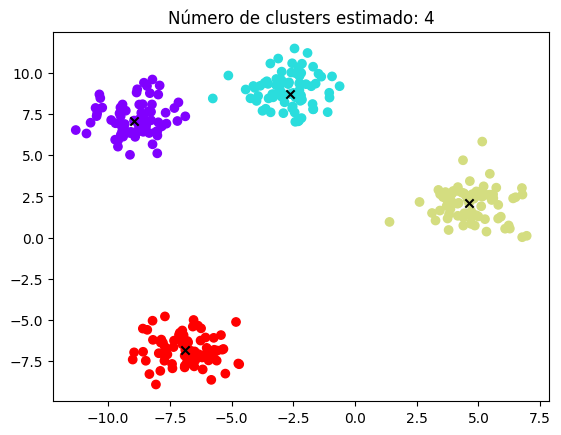

In [17]:
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
labels = affinity_propagation.labels_
num_clusters = len(cluster_centers_indices)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(X[cluster_centers_indices, 0], X[cluster_centers_indices, 1], c='black', marker='x')
plt.title(f'Número de clusters estimado: {num_clusters}')
plt.show()

En la gráfica, cada punto representa una instancia y su color indica el cluster al que fue asignado. Los puntos marcados con "x" son los exemplares o centroides de cada cluster. El número de clusters estimado se muestra en el título de la gráfica.

La propagación de afinidad es un algoritmo poderoso para encontrar clusters en datos sin necesidad de especificar el número de clusters de antemano. Sin embargo, también puede ser computacionalmente costoso y sensible a los parámetros, por lo que es importante ajustarlos adecuadamente para obtener resultados óptimos.

| **Inicio** | **atrás 17** | **Siguiente 19** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./17_K-Vecinos_Mas_Cercanos.ipynb)| [⏩](./19_Precision_Accuracy_Recall_F1.ipynb)|